# Examples on how to execute UDP (User Defined Processes)
This script explains how to use UDP's designed in the PEOPLE project. <br>
The UDP's always give back a DataCube or a VectorCube (specified in the description of the UDP) <br>
<br>

In [1]:
import openeo

In [2]:
# additional imports for visualization and checks
from shapely.geometry import shape
import rasterio
from rasterio.plot import show, show_hist
from matplotlib import pyplot

In [3]:
# establish connection to OpenEO and authenticate
connection = openeo.connect("openeo.vito.be").authenticate_oidc()

Authenticated using refresh token.


In [4]:
# specify the geometry --> here we just hardcode Luxemburg
polygon =  {"type": "Polygon", 
            "coordinates": [
                [[6.234, 49.9], [6.245, 49.897], [6.268, 49.889], [6.294, 49.879], [6.313, 49.873], [6.343, 49.865], 
                 [6.392, 49.849], [6.399, 49.847], [6.44, 49.834], [6.452, 49.828], [6.47, 49.823], [6.474, 49.82], 
                 [6.47, 49.802], [6.467, 49.794], [6.455, 49.765], [6.448, 49.743], [6.433, 49.698], [6.418, 49.653], 
                 [6.407, 49.627], [6.403, 49.619], [6.399, 49.603], [6.399, 49.6], [6.395, 49.592], [6.384, 49.558], 
                 [6.38, 49.55], [6.369, 49.473], [6.365, 49.471], [6.339, 49.471], [6.328, 49.471], [6.324, 49.473], 
                 [6.275, 49.476], [6.257, 49.476], [6.215, 49.478], [6.174, 49.481], [6.144, 49.481], [6.129, 49.484], 
                 [6.125, 49.484], [6.058, 49.486], [6.009, 49.489], [5.998, 49.492], [5.964, 49.492], [5.957, 49.494], 
                 [5.942, 49.494], [5.897, 49.497], [5.893, 49.497], [5.844, 49.529], [5.829, 49.539], [5.818, 49.547], 
                 [5.829, 49.571], [5.859, 49.643], [5.87, 49.672], [5.87, 49.675], [5.885, 49.709], [5.874, 49.72], 
                 [5.874, 49.722], [5.848, 49.749], [5.803, 49.794], [5.754, 49.844], [5.747, 49.852], [5.747, 49.855], 
                 [5.754, 49.863], [5.758, 49.865], [5.762, 49.871], [5.762, 49.873], [5.769, 49.881], [5.773, 49.884], 
                 [5.773, 49.887], [5.803, 49.918], [5.829, 49.953], [5.863, 49.99], [5.964, 50.109], [6.024, 50.183], 
                 [6.069, 50.162], [6.08, 50.157], [6.114, 50.141], [6.137, 50.13], [6.144, 50.112], [6.163, 50.072], 
                 [6.182, 50.027], [6.189, 50.011], [6.193, 49.998], [6.2, 49.982], [6.215, 49.95], [6.219, 49.94], 
                 [6.223, 49.926], [6.227, 49.921], [6.227, 49.918], [6.23, 49.91], [6.234, 49.9]]
            ]
           }

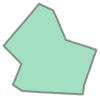

In [5]:
# show the extent Luxemburg at NUTS level-0
shape(polygon)

## FCOVER dataset in original resolution and projection

In [6]:
cube = connection.datacube_from_process(
    process_id="udp_annual_avg_fcover",
    namespace="https://raw.githubusercontent.com/integratedmodelling/OpenEO-UDP-UDF-catalogue/main/UDP/json/udp_annual_avg_fcover.json",
    geometry=polygon,   
    year=2020)

In [7]:
# since the result is a single file we do not need a batch job - synchronous request
%time cube.download(r'./FCOVER_annual-average_2020.tif')

Wall time: 26.9 s


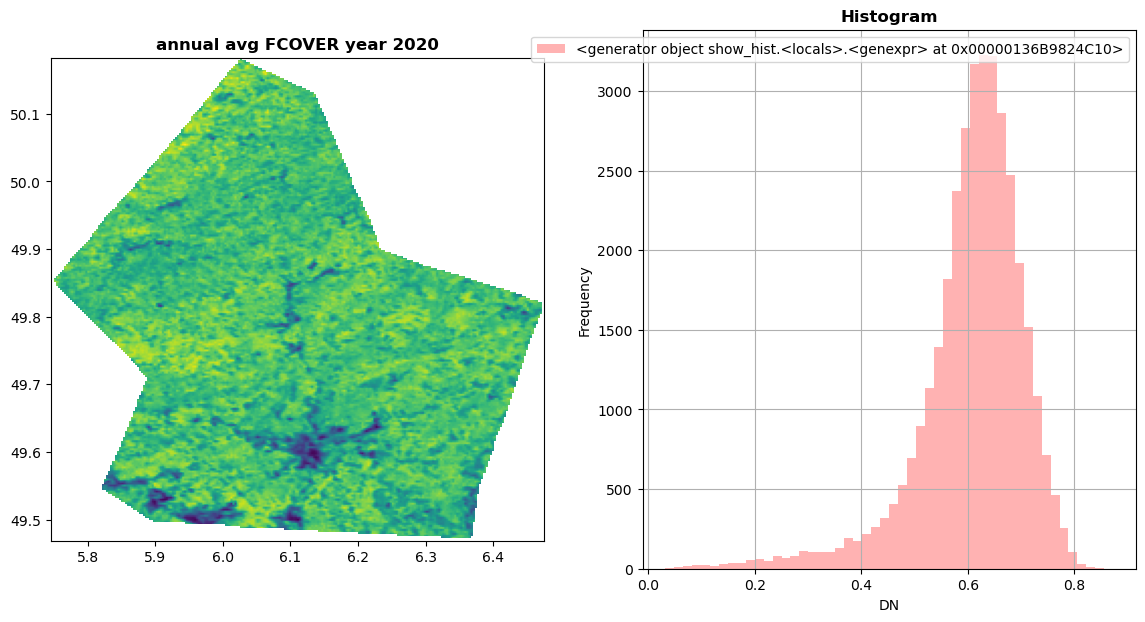

In [8]:
# visu result
with rasterio.open("FCOVER_annual-average_2020.tif") as src:
    fig, (axrgb, axhist) = pyplot.subplots(1, 2, figsize=(14,7))
    show(src, with_bounds=True, ax=axrgb, title='annual avg FCOVER year 2020')
    show_hist(src, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram", ax=axhist)
    pyplot.show()

## reprojected FCOVER dataset (EPSG: 3035, 100m spatial resolution)

In [9]:
cube2 = connection.datacube_from_process(
    process_id="udp_annual_avg_fcover",
    namespace="https://raw.githubusercontent.com/integratedmodelling/OpenEO-UDP-UDF-catalogue/main/UDP/json/udp_annual_avg_fcover.json",
    geometry=polygon,   
    year=2020,
    output_warp=True,
    output_epsg=3035,
    resolution=100)

In [10]:
# in this call we will use the asynchronous data handling
%time cube2.execute_batch(r'./FCOVER_annual-average_2020_100m_EPSG3035.tif')

0:00:00 Job 'j-23121196287b498bb76687cddd159cee': send 'start'
0:00:20 Job 'j-23121196287b498bb76687cddd159cee': queued (progress N/A)
0:00:25 Job 'j-23121196287b498bb76687cddd159cee': queued (progress N/A)
0:00:31 Job 'j-23121196287b498bb76687cddd159cee': queued (progress N/A)
0:00:39 Job 'j-23121196287b498bb76687cddd159cee': queued (progress N/A)
0:00:49 Job 'j-23121196287b498bb76687cddd159cee': queued (progress N/A)
0:01:02 Job 'j-23121196287b498bb76687cddd159cee': queued (progress N/A)
0:01:17 Job 'j-23121196287b498bb76687cddd159cee': queued (progress N/A)
0:01:37 Job 'j-23121196287b498bb76687cddd159cee': queued (progress N/A)
0:02:01 Job 'j-23121196287b498bb76687cddd159cee': running (progress N/A)
0:02:31 Job 'j-23121196287b498bb76687cddd159cee': running (progress N/A)
0:03:09 Job 'j-23121196287b498bb76687cddd159cee': running (progress N/A)
0:03:56 Job 'j-23121196287b498bb76687cddd159cee': finished (progress N/A)
Wall time: 3min 58s


<BatchJob job_id='j-23121196287b498bb76687cddd159cee'>

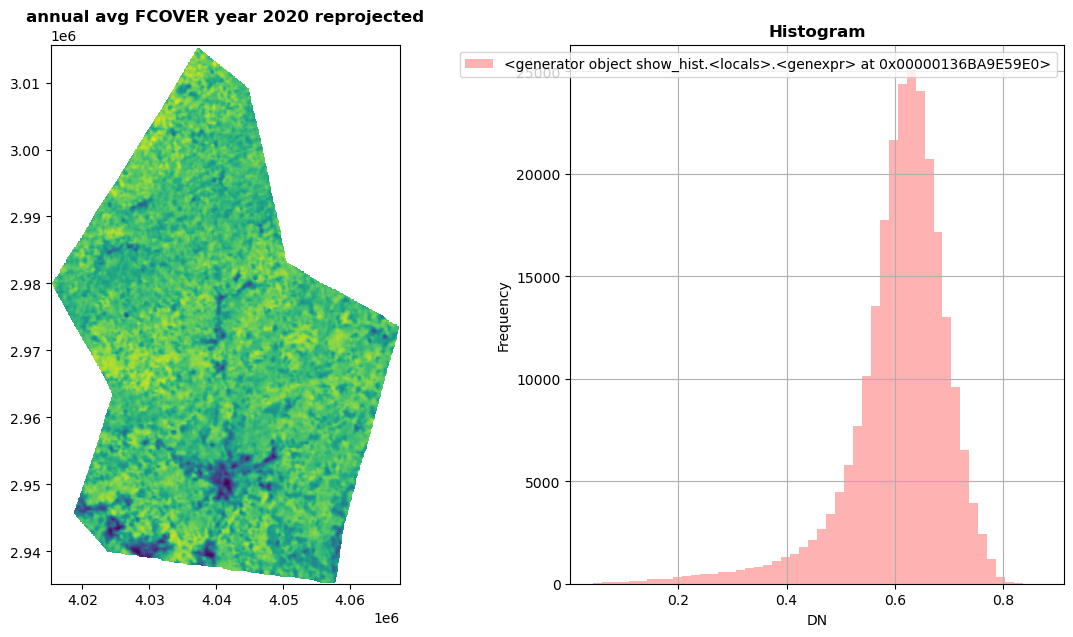

In [11]:
# visu result
with rasterio.open("FCOVER_annual-average_2020_100m_EPSG3035.tif") as src:
    fig, (axrgb, axhist) = pyplot.subplots(1, 2, figsize=(14,7))
    show(src, with_bounds=True, ax=axrgb, title='annual avg FCOVER year 2020 reprojected')
    show_hist(src, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram", ax=axhist)
    pyplot.show()

## arable/non-arable mask based on Corine ACC
reprojected to EPSG:3035 and 100m resolution

In [12]:
# prepare parameters for the UDP
# Note: theoretically not needed since we have a default dict --> but lets change the values to show its usage
remapping_dict = {141: 1, 211: 2, 212: 2, 213: 2, 221: 1, 222: 1, 223: 1, 231: 1, 241: 1, 242: 1, 243: 1, 
                  244: 1, 311: 1, 312: 1, 313: 1, 321: 1, 322: 1, 323: 1, 324: 1, 333: 1, 334: 1}

In [13]:
cube3 = connection.datacube_from_process(
    process_id="udp_CORINE_arable_mask",
    namespace="https://raw.githubusercontent.com/integratedmodelling/OpenEO-UDP-UDF-catalogue/main/UDP/json/udp_corine_arable_mask.json",
    geometry=polygon,   
    year=2020,
    remapping_dict=remapping_dict,
    output_warp=True,
    output_epsg=3035,
    resolution=100)

In [14]:
# again, we need no batch job to downlad a single file
%time cube3.download(r'./arable-mask_2020_100m_EPSG3035.tif')

Preflight process graph validation raised: [ExtentTooLarge] Requested extent for collection 'CORINE_LAND_COVER_ACCOUNTING_LAYERS' is too large to process. Estimated number of pixels: 5.00e+19, threshold: 1.00e+11.


Wall time: 38.4 s


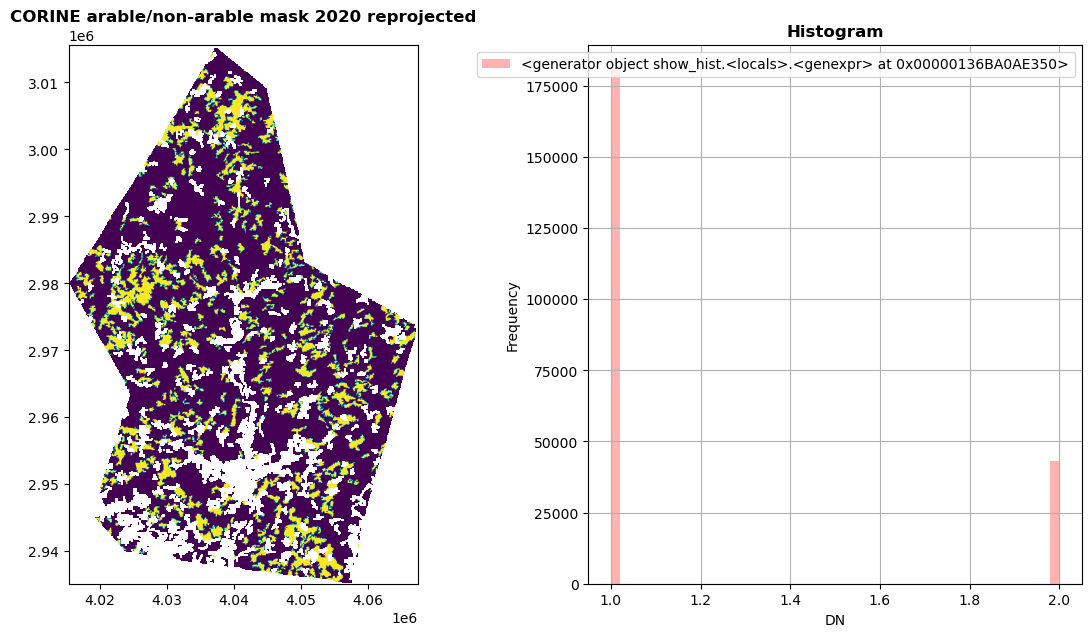

In [15]:
# visu result
with rasterio.open("arable-mask_2020_100m_EPSG3035.tif") as src:
    fig, (axrgb, axhist) = pyplot.subplots(1, 2, figsize=(14,7))
    show(src, with_bounds=True, ax=axrgb, title='CORINE arable/non-arable mask 2020 reprojected')
    show_hist(src, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram", ax=axhist)
    pyplot.show()